# Plotting Change in FFDI thresholds 

In [1]:
# importing sys
import sys
# adding plotting module to the system path
sys.path.insert(0, '/g/data/xv83/rxm599/acs/plotting_maps')
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask

In [2]:
# Start Cluster 
from dask.distributed import Client
# Set configuration options
dask.config.set({
    'distributed.comm.timeouts.connect': '90s',  # Timeout for connecting to a worker
    'distributed.comm.timeouts.tcp': '90s',  # Timeout for TCP communications
})

client = Client()
client

2024-08-22 18:43:16,714 - distributed.preloading - INFO - Creating preload: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py
2024-08-22 18:43:16,716 - distributed.utils - INFO - Reload module schedplugin from .py file
2024-08-22 18:43:16,735 - distributed.preloading - INFO - Import preload module: /g/data/hh5/public/apps/dask-optimiser/schedplugin.py


Modifying workers


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/8787/status,
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/8787/status,Workers: 24
Total threads: 24,Total memory: 0 B
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36861,Workers: 24
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:36769,Total threads: 1
Dashboard: /node/gadi-cpu-clx-1728.gadi.nci.org.au/31863/proxy/42317/status,Memory: 0 B
Nanny: tcp://127.0.0.1:43679,


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load some dataset
# for example, here we load BARPA rainfall data
filename = '/g/data/ia39/ncra/fire/change_threshold_100.nc'
ds = xr.open_dataset(filename)
ds2=xr.open_dataset('/g/data/ia39/ncra/fire/change_threshold_75.nc')
ds3=xr.open_dataset('/g/data/ia39/ncra/fire/change_threshold_50.nc')

In [3]:
# Calculate a 2D mappable data array
da = ds.days100[2,:,:]
ds

<xarray.Dataset> Size: 20MB
Dimensions:  (period: 4, lat: 691, lon: 886)
Coordinates:
  * period   (period) int64 32B 0 1 2 3
  * lat      (lat) float64 6kB -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 156.2 156.2 156.2
Data variables:
    days100  (period, lat, lon) float64 20MB ...

#  Plot
Use ```plot_acs_hazard``` to visualise the hazard on a map of Australia.


In [4]:
# set intervals for shading
a=range(0,11,1) 
b=range(12,14,2)
lev=np.concatenate([a,b])
# set figure location
dir='/g/data/xv83/rxm599/acs/hazard_fire/figures/'
ptype='pdf'
ptype='png'

In [5]:
def ncra_plots(a1,a2,a3):
    fig = plt.subplots(5, 1, figsize=(22, 24)) 
    plt.subplot(3,1,1)
    plot_acs_hazard(data = a1,
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>100)",
                date_range = "GWL 1.5",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold100_GW1p5.pdf");
    return    
# did not work!!
a1=ds.days100[1,:,:]
a2=a1
a3=a1
#ncra_plots(a1,a2,a3)

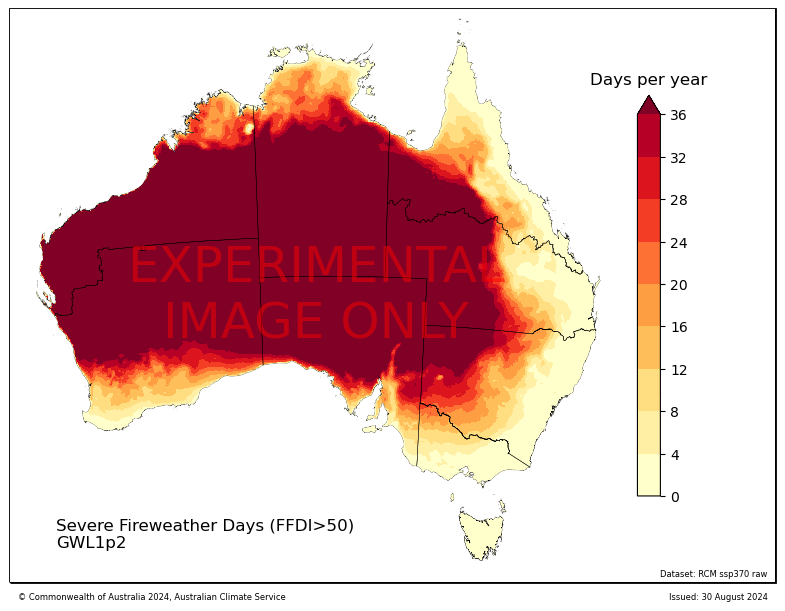

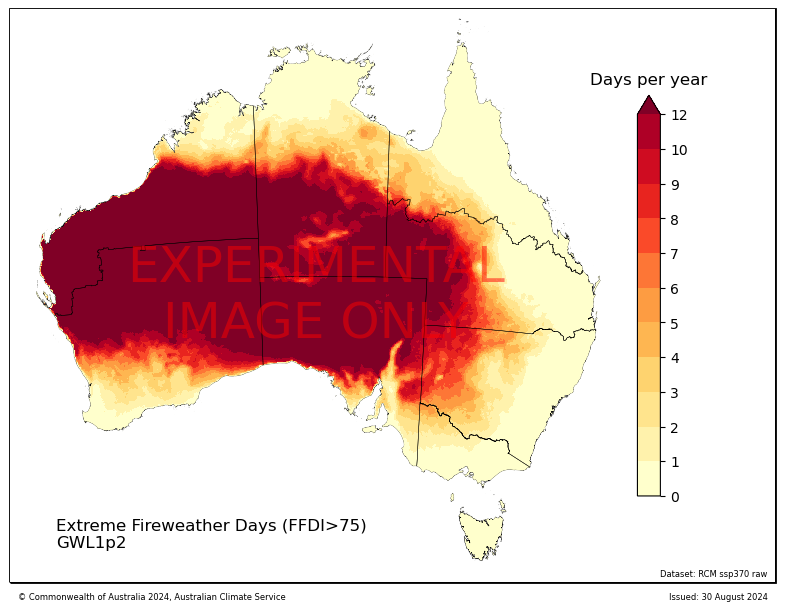

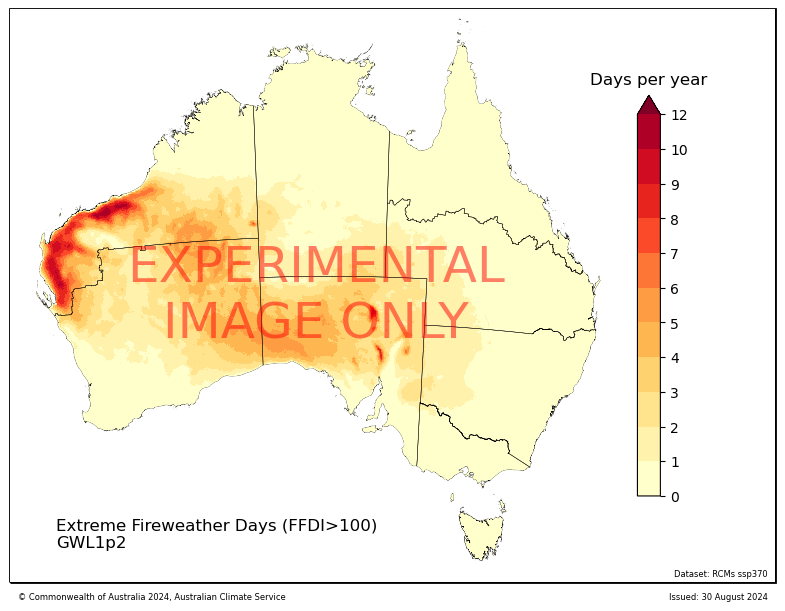

In [12]:
# Plot GWL1.2 threshold
ds4=xr.open_dataset('/g/data/ia39/ncra/fire/GWL1p2_threshold_50.nc')
plot_acs_hazard(data = ds4.days50,
                regions = regions_dict['ncra_regions'],
                title = "Severe Fireweather Days (FFDI>50)",
                date_range = "GWL1p2",
                cmap = cmap_dict["EHF_days"],
                ticks = range(0,40,4),
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold50_GWL1p2."+ptype);

ds4=xr.open_dataset('/g/data/ia39/ncra/fire/GWL1p2_threshold_75.nc')
plot_acs_hazard(data = ds4.days75,
                regions = regions_dict['ncra_regions'],
                title = "Extreme Fireweather Days (FFDI>75)",
                date_range = "GWL1p2",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold75_GWL1p2."+ptype);

ds4=xr.open_dataset('/g/data/ia39/ncra/fire/GWL1p2_threshold_100.nc')
plot_acs_hazard(data = ds4.days100,
                regions = regions_dict['ncra_regions'],
                title = "Extreme Fireweather Days (FFDI>100)",
                date_range = "GWL1p2",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCMs ssp370",
                outfile = dir+"threshold100_GWL1p2."+ptype);

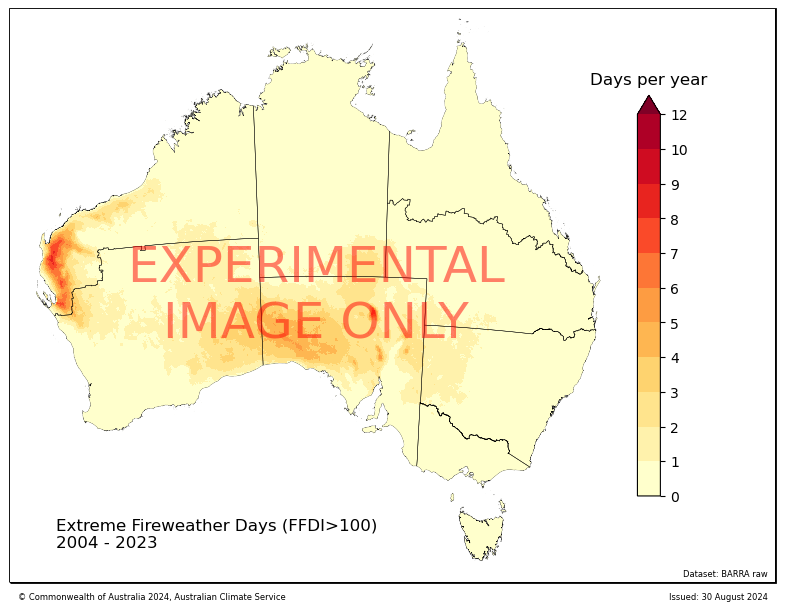

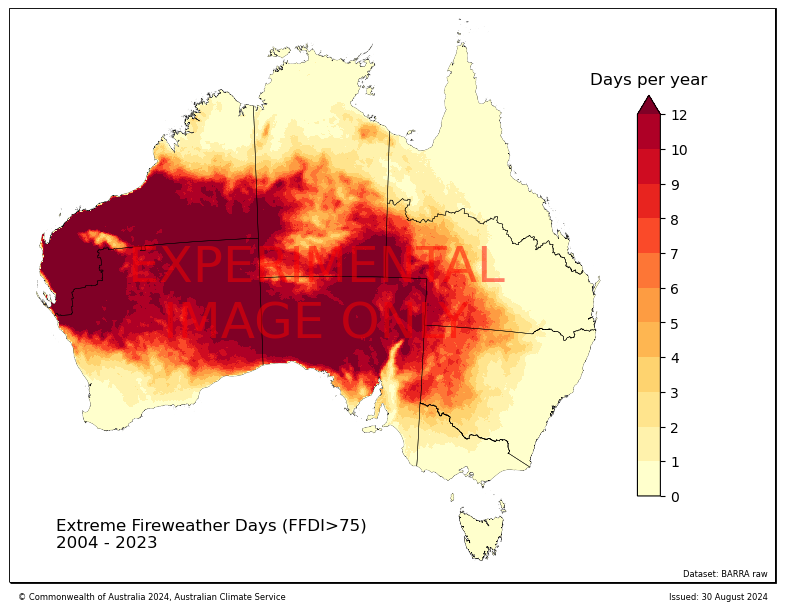

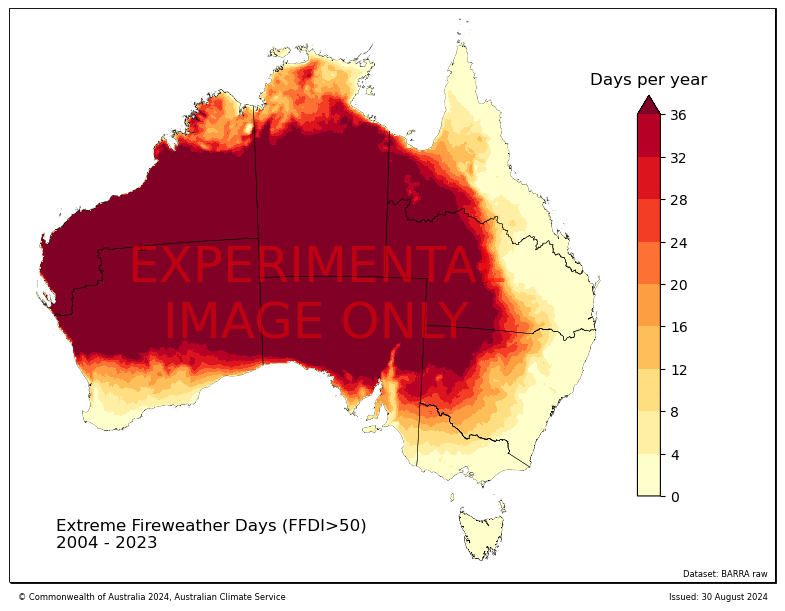

In [13]:
# Plot BARRA threshold
ds4=xr.open_dataset('/g/data/ia39/ncra/fire/AGCD-05i_BOM_ERA5_historical_hres_BARRA-R2_v1_day_ffdi_threshold.nc')
plot_acs_hazard(data = ds4.days100,
                regions = regions_dict['ncra_regions'],
                title = "Extreme Fireweather Days (FFDI>100)",
                date_range = "2004 - 2023",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "BARRA raw",
                outfile = dir+"threshold100_BARRA."+ptype);

plot_acs_hazard(data = ds4.days75,
                regions = regions_dict['ncra_regions'],
                title = "Extreme Fireweather Days (FFDI>75)",
                date_range = "2004 - 2023",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "BARRA raw",
                outfile = dir+"threshold75_BARRA."+ptype);
plot_acs_hazard(data = ds4.days50,
                regions = regions_dict['ncra_regions'],
                title = "Extreme Fireweather Days (FFDI>50)",
                date_range = "2004 - 2023",
                cmap = cmap_dict["EHF_days"],
                ticks = range(0,40,4),
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "BARRA raw",
                outfile = dir+"threshold50_BARRA."+ptype);

CPU times: user 17.5 s, sys: 58.7 ms, total: 17.6 s
Wall time: 17.7 s


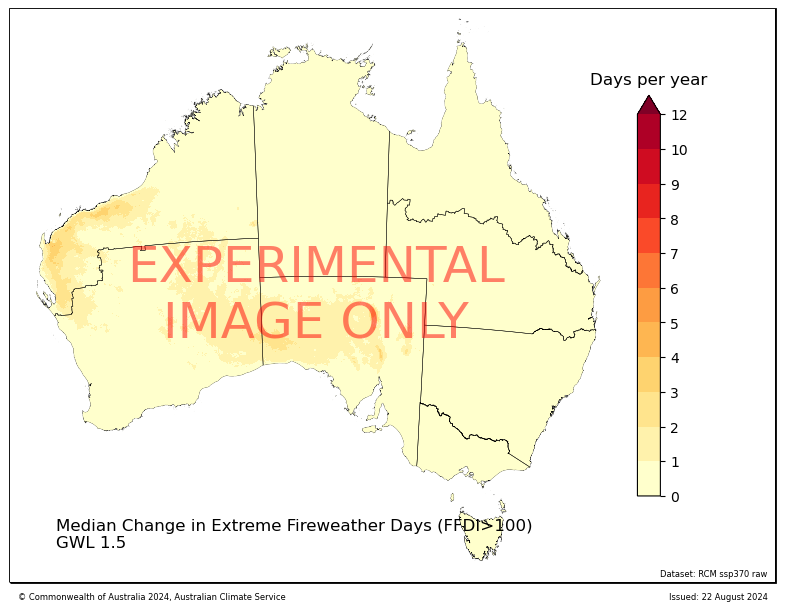

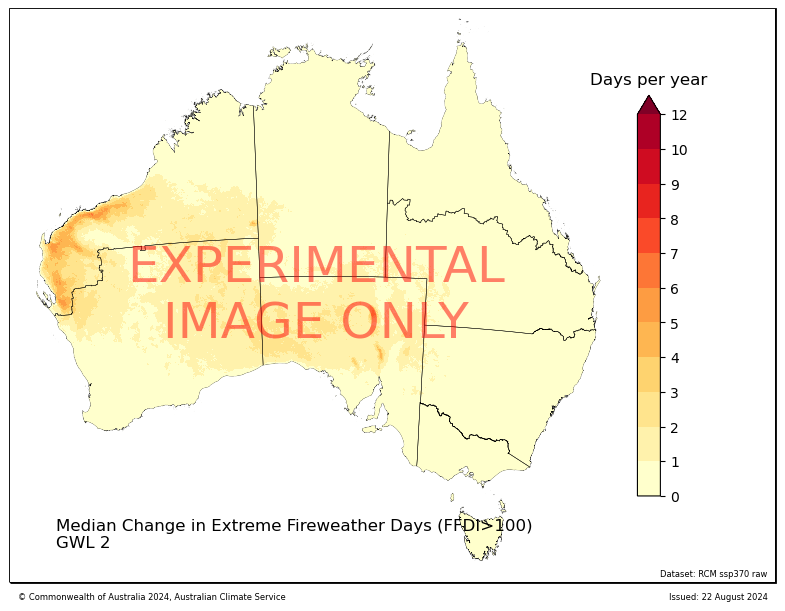

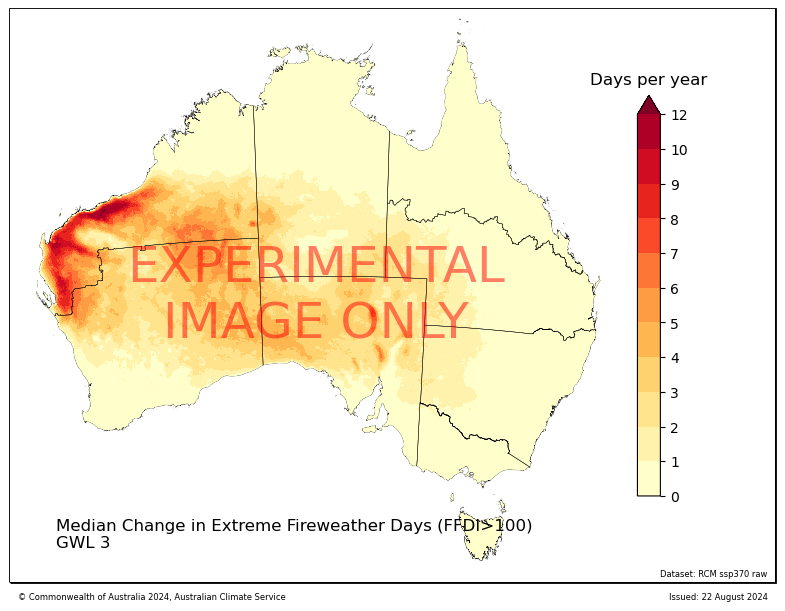

In [18]:
%%time
# Days with FFDI > 100
# GWL 1.5
plot_acs_hazard(data = ds.days100[1,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>100)",
                date_range = "GWL 1.5",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold100_GW1p5."+ptype);
# GWL 2 
plot_acs_hazard(data = ds.days100[2,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>100)",
                date_range = "GWL 2",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold100_GW2."+ptype);

# GWL3 
plot_acs_hazard(data = ds.days100[3,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>100)",
                date_range = "GWL 3",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold100_GW3."+ptype);


CPU times: user 16.7 s, sys: 107 ms, total: 16.8 s
Wall time: 17 s


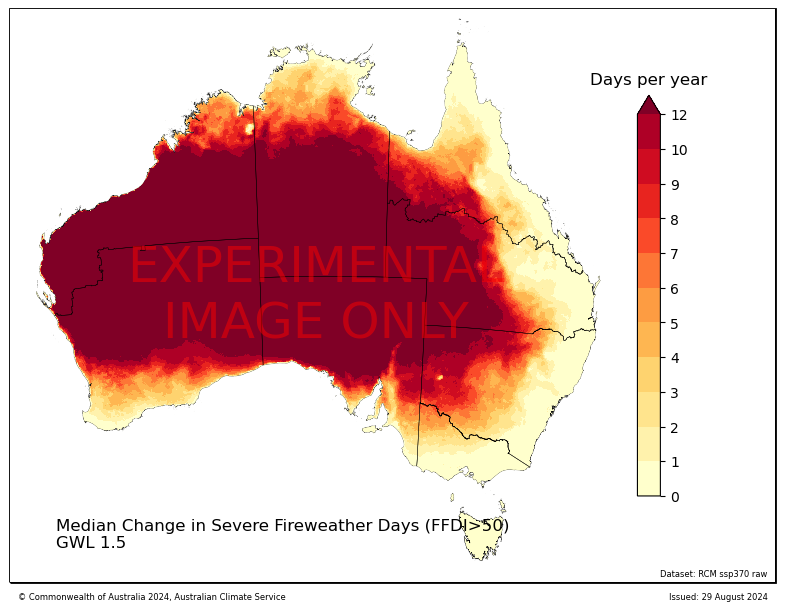

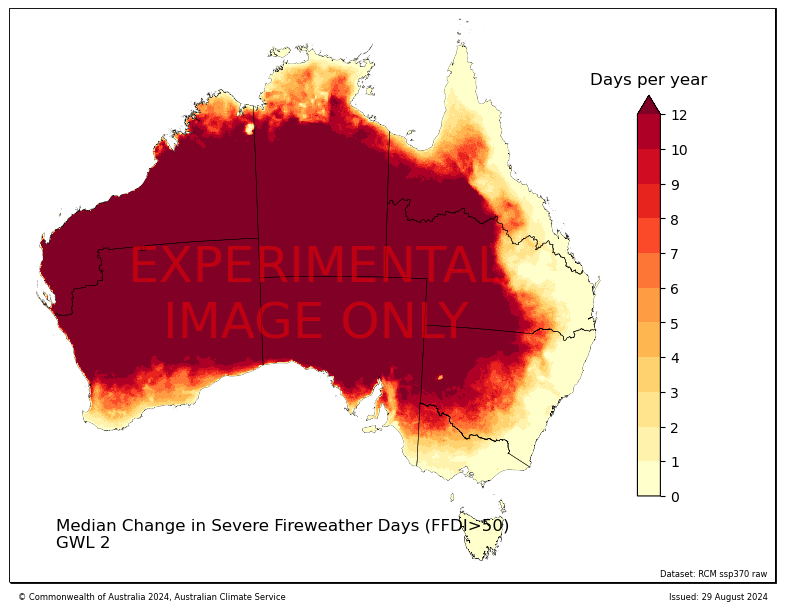

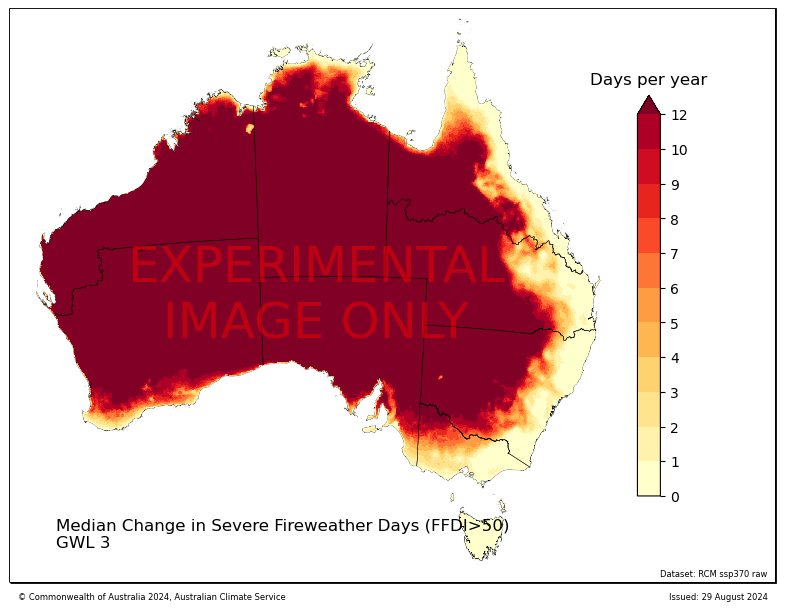

In [8]:
%%time
# Extreme fireweather days FFDI >50
plot_acs_hazard(data = ds3.days50[1,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Severe Fireweather Days (FFDI>50)",
                date_range = "GWL 1.5",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold50_GW1p5."+ptype);
# 
plot_acs_hazard(data = ds3.days50[2,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Severe Fireweather Days (FFDI>50)",
                date_range = "GWL 2",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold50_GW2."+ptype);
# 
plot_acs_hazard(data = ds3.days50[3,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Severe Fireweather Days (FFDI>50)",
                date_range = "GWL 3",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold50_GW3."+ptype);

CPU times: user 17.1 s, sys: 74.3 ms, total: 17.2 s
Wall time: 17.6 s


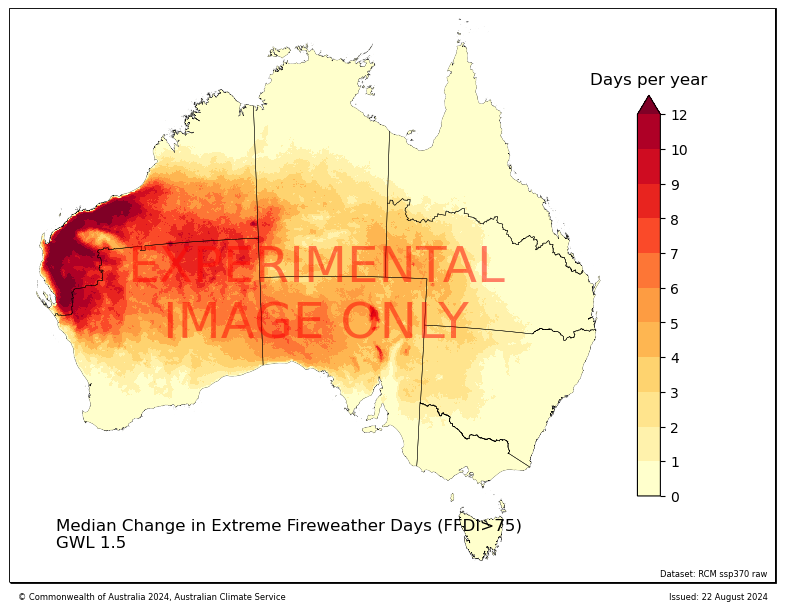

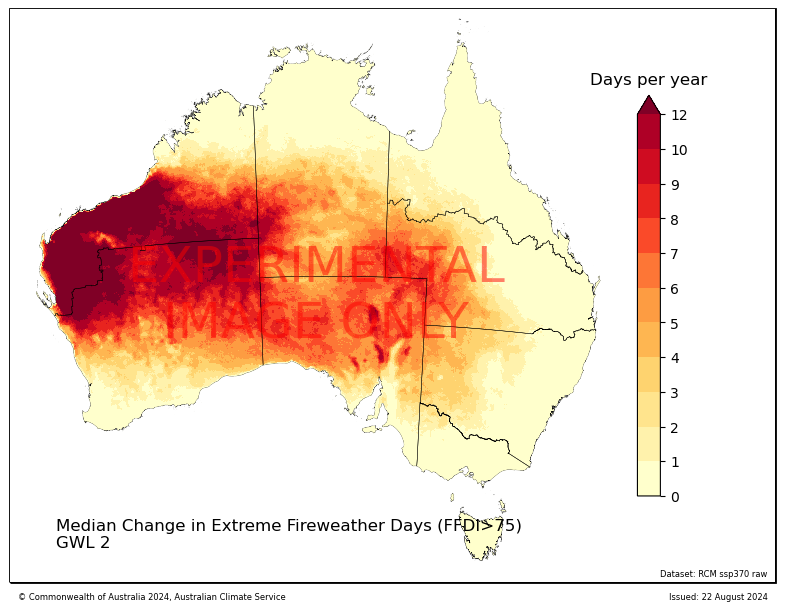

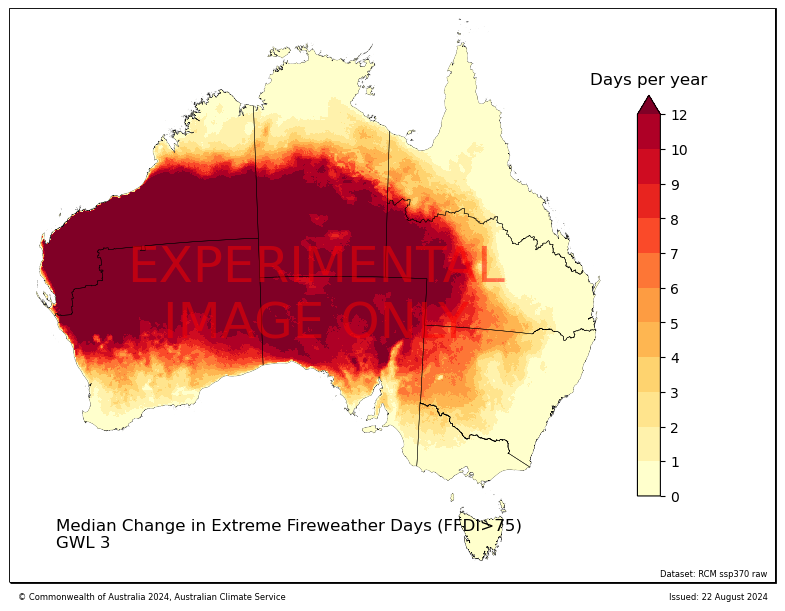

In [20]:
%%time
# Extreme fireweather days FFDI > 75
plot_acs_hazard(data = ds2.days75[1,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>75)",
                date_range = "GWL 1.5",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold75_GW1p5."+ptype);
# Extreme fireweather days
plot_acs_hazard(data = ds2.days75[2,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>75)",
                date_range = "GWL 2",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold75_GW2."+ptype);
# Extreme fireweather days
plot_acs_hazard(data = ds2.days75[3,:,:],
                regions = regions_dict['ncra_regions'],
                title = "Median Change in Extreme Fireweather Days (FFDI>75)",
                date_range = "GWL 3",
                cmap = cmap_dict["EHF_days"],
                ticks = lev,
                cbar_label = "Days per year",
                cbar_extend = "max",                
                dataset_name = "RCM ssp370 raw",
                outfile = dir+"threshold75_GW3."+ptype);